In [1]:
# Customizing Colorbars 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-white")

%matplotlib inline 
import numpy as np 

/tmp/ipykernel_443432/2608149516.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


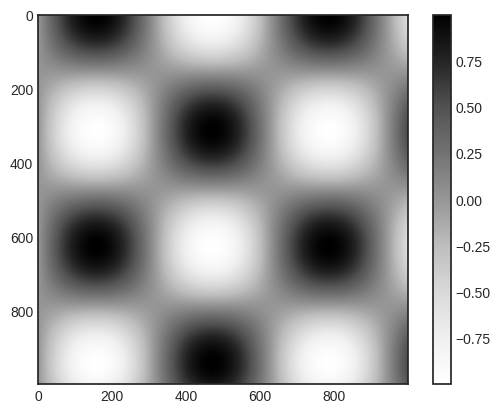

In [3]:
x = np.linspace(0,10,1000)
I = np.sin(x) * np.cos(x[:,np.newaxis])

plt.imshow(I)
plt.colorbar();

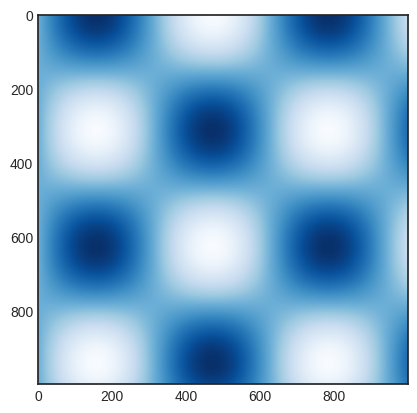

In [4]:
plt.imshow(I, cmap="Blues")

In [ ]:
# Chose the Colormap

# Sequential => sequence of colors 
# Divergent => two distinct colors (positive and negative)
# Qualitative => mix of colors 

/tmp/ipykernel_443432/2090120577.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/tmp/ipykernel_443432/2090120577.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


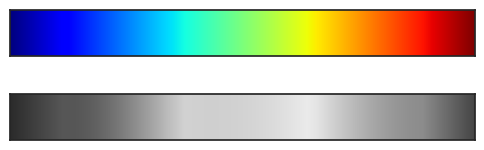

In [6]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    # convert RGBA to perceived grayscale luminance 
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:,:3] ** 2, RGB_weight))

    colors[:,:3] = luminance[:,np.newaxis]

    return LinearSegmentedColormap.from_list(
        cmap.name + "_gray", colors, cmap.N
    )

def view_colormap(cmap):
    """plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))

    fig, ax = plt.subplots(2, 
                           figsize=(6,2),
                           subplot_kw=dict(xticks=[], yticks=[])
                           )
    ax[0].imshow([colors], extent=[0,10,0,1])
    ax[1].imshow([grayscale],extent=[0,10,0,1])

view_colormap("jet")

/tmp/ipykernel_443432/2090120577.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
/tmp/ipykernel_443432/2090120577.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


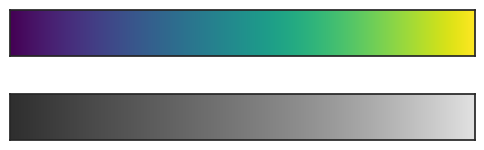

In [8]:
view_colormap("viridis")

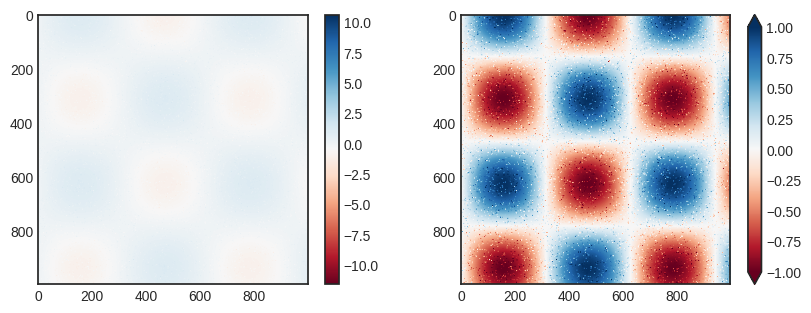

In [9]:
# Color limits and extensions 

# make noise in 1% of the image pixels 
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0,3, np.count_nonzero(speckles))

plt.figure(figsize=(10,3.5))

plt.subplot(1,2,1)
plt.imshow(I, cmap="RdBu")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(I, cmap="RdBu")
plt.colorbar(extend="both")
plt.clim(-1,1)

/tmp/ipykernel_443432/134992690.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(I, cmap=plt.cm.get_cmap("Blues",6))


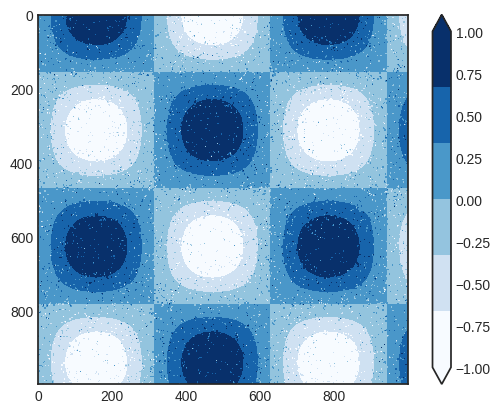

In [10]:
# Discrete Colorbars 

plt.imshow(I, cmap=plt.cm.get_cmap("Blues",6))
plt.colorbar(extend="both")
plt.clim(-1,1)